In [2]:
import time
import numpy as np
import clipperpy
import matplotlib.pyplot as plt

In [11]:
def read_data_from_txt(txt_file):
    '''
    the txt file should be in the following format in each line:
    label x y z
    get the x y value return a 2 by n numpy array
    '''
    data = np.loadtxt(txt_file, usecols=(0, 1, 2), dtype=np.float64)
    return data.T

def visualize_DA(data_a, data_b, Ain, tf, displacement = 80):
    '''
    data_a: 3 by n numpy array, label, x, y lable range from 0 to -2
    data_b: 3 by m numpy array, label, x, y
    Ain: k by 2 numpy array, mapping point indexed by row in data_a to data_b
    '''
    # draw circles with label 0 in red, label -1 in blue, label -2 in green for data a
    data_a_position = data_a[1:3, :]
    transformed_back_data_b = transform_data(data_b, np.linalg.inv(tf))
    data_b_position = transformed_back_data_b[1:3, :]
    # for each point in data a, draw a line to the corresponding point in data b
    for i in range(Ain.shape[0]):
        a = data_a_position[:, Ain[i, 0]]
        b = data_b_position[:, Ain[i, 1]]
        plt.plot([a[0], b[0]+ displacement] , [a[1], b[1]], 'k-')
    for i in range(data_a_position.shape[1]):
        if data_a[0, i] == 3 or data_a[0, i] == 2:
            plt.plot(data_a_position[0, i], data_a_position[1, i], 'go')
        elif data_a[0, i] == 1:
            plt.plot(data_a_position[0, i], data_a_position[1, i], 'gs')
        elif data_a[0, i] == 0:
            plt.plot(data_a_position[0, i], data_a_position[1, i], 'go')
    for i in range(data_b_position.shape[1]):
        if data_b[0, i] == 3 or data_b[0, i] == 2:
            plt.plot(data_b_position[0, i] + displacement, data_b_position[1, i], 'ro')
        elif data_b[0, i] == 1:
            plt.plot(data_b_position[0, i] + displacement, data_b_position[1, i], 'rs')
        elif data_b[0, i] == 0:
            plt.plot(data_b_position[0, i] + displacement, data_b_position[1, i], 'ro')

    
    plt.show()

def transform_data(data, tf):
    '''
    data: 3 by n numpy array, label, x, y
    tf: 3 by 3 numpy array, 2D transformation matrix
    return data_transformed: 3 by n numpy array, label, x, y
    '''
    data_transformed = np.zeros_like(data)
    data_transformed[0, :] = data[0, :]
    data_xy = data[1:3, :]
    data_xy1 = np.vstack((data_xy, np.ones(data_xy.shape[1]))).T
    data_xy1_transformed = data_xy1 @ tf # n by 3
    data_xy_transformed = data_xy1_transformed[:, 0:2].T # 2 by n
    data_transformed[1:3, :] = data_xy_transformed
    return data_transformed

def visualize_data_a(data):
    '''
    data: 3 by n numpy array, label, x, y
    '''
    data_position = data[1:3, :]
    data_label = data[0, :]
    for i in range(data_position.shape[1]):
        if data_label[i] == 3 or data_label[i] == 2:
            plt.plot(data_position[0, i], data_position[1, i], 'go')
        elif data_label[i] == 1:
            plt.plot(data_position[0, i], data_position[1, i], 'gs')
        elif data_label[i] == 0:
            plt.plot(data_position[0, i], data_position[1, i], 'go')
    plt.show()

def visualize_data_b(data):
    '''
    data: 3 by n numpy array, label, x, y
    '''
    data_position = data[1:3, :]
    data_label = data[0, :]
    for i in range(data_position.shape[1]):
        if data_label[i] == 3 or data_label[i] == 2:
            plt.plot(data_position[0, i], data_position[1, i], 'ro')
        elif data_label[i] == 1:
            plt.plot(data_position[0, i], data_position[1, i], 'rs')
        elif data_label[i] == 0:
            plt.plot(data_position[0, i], data_position[1, i], 'ro')
    plt.show()
    

def generate_DA(size_a, size_b):
    '''
    size_a: number of points in data A
    size_b: number of points in data B
    A: min(size_a, size_b) by 2 numpy array, mapping point indexed by row in data A to data B 
    '''
    DA = np.zeros((size_a*size_b, 2), dtype=np.int32)
    for i in range(size_a):
        for j in range(size_b):
            DA[i*size_b+j, 0] = i
            DA[i*size_b+j, 1] = j
    return DA

def generate_DA_closest(size_a, size_b, data_a, data_b):
    '''
    size_a: number of points in data A
    size_b: number of points in data B
    data_a: 3 by size_a numpy array, label, x, y
    data_b: 3 by size_b numpy array, label, x, y
    A: min(size_a, size_b) by 2 numpy array, mapping point indexed by row in data A to data B 
    '''
    DA = []
    min_distance = 30
    for i in range(size_a):
        for j in range(size_b):
            distance = np.linalg.norm(data_a[1:3, i] - data_b[1:3, j])
            if distance < min_distance:
                DA.append([i, j])
    DA = np.array(DA, dtype=np.int32)
    return DA

def perturb_data(data, Transformation):
    '''
    data: 3 by n numpy array, label, x, y
    Transformation: 3 by 3 numpy array, 2D transformation matrix
    return data_perturbed: 3 by n numpy array, label, x, y
    '''
    data_perturbed = np.zeros_like(data)
    data_perturbed[0, :] = data[0, :]
    data_xy = data[1:3, :]
    data_xy1 = np.vstack((data_xy, np.ones(data_xy.shape[1]))).T
    data_xy1_perturbed = data_xy1 @ Transformation # n by 3
    data_xy_perturbed = data_xy1_perturbed[:, 0:2].T # 2 by n
    data_perturbed[1:3, :] = data_xy_perturbed
    return data_perturbed

def generate_2d_txt_file(txt_file):
    '''
    txt_data: 3 by n numpy array, label, x, y, z
    add a coma between x and y
    '''
    data = np.loadtxt(txt_file, usecols=(1, 2), dtype=np.float64)
    new_txt_file = txt_file.replace('.txt', '_2d.txt')
    np.savetxt(new_txt_file, data, fmt='%f', delimiter=',')
    


In [12]:
def visualize_points(points):
    '''
    points: 2 by n numpy array, x, y
    '''
    plt.plot(points[0, :], points[1, :], 'ro')
    plt.show()

def transform_2d_points(points, tf):
    '''
    points: 2 by n numpy array, x, y
    tf: 3 by 3 numpy array, 2D transformation matrix
    return points_transformed: 2 by n numpy array, x, y
    '''
    points_transformed = np.zeros_like(points)
    points1 = np.vstack((points, np.ones(points.shape[1]))).T
    points1_transformed = points1 @ tf # n by 3
    points_transformed = points1_transformed[:, 0:2].T # 2 by n
    return points_transformed

def visulize_da(points_a, points_b, gt_tf, displacement = 80):
    '''
    points_a: 2 by n numpy array, x, y
    points_b: 2 by m numpy array, x, y
    gt_tf: 3 by 3 numpy array, ground truth transformation matrix
    '''
    points_b_transformed = transform_2d_points(points_b, gt_tf)
    for i in range(points_a.shape[1]):
        plt.plot(points_a[0, i], points_a[1, i], 'go')
    for i in range(points_b.shape[1]):
        plt.plot(points_b[0, i] + displacement, points_b[1, i], 'ro')
    for i in range(points_a.shape[1]):
        plt.plot([points_a[0, i], points_b_transformed[0, i] + displacement], [points_a[1, i], points_b_transformed[1, i]], 'k-')
    plt.show()


In [8]:
tri1 = np.load("/home/jiuzhou/clipper_semantic_object/examples/data/matched_points1.npy")
tri2 = np.load("/home/jiuzhou/clipper_semantic_object/examples/data/matched_points2.npy")
point1 = tri1.reshape(-1, 2).astype(np.float64).T
point2 = tri2.reshape(-1, 2).astype(np.float64).T

# 
yaw = 0
dx = 0
dy = 0
perturb_tf = np.array([[np.cos(yaw), -np.sin(yaw), dx], [np.sin(yaw), np.cos(yaw), dy], [0, 0, 1]])
# data2 in data1's frame
gt_yaw = 0
gt_dx = 0
gt_dy = 0
gt_tf = np.array([[np.cos(gt_yaw), -np.sin(gt_yaw), gt_dx], [np.sin(gt_yaw), np.cos(gt_yaw), gt_dy], [0, 0, 1]])


A = np.arange(point1.shape[1])
A = np.hstack((A.reshape(-1, 1), A.reshape(-1, 1)))
A = A.astype(np.int32)

In [9]:
print("A shape: ", A.shape)
print("point1 shape: ", point1.shape)
print("point2 shape: ", point2.shape)

A shape:  (366, 2)
point1 shape:  (2, 366)
point2 shape:  (2, 366)


In [10]:
iparams = clipperpy.invariants.EuclideanDistanceParams()
iparams.sigma = 0.1
iparams.epsilon = 0.3
invariant = clipperpy.invariants.EuclideanDistance(iparams)

params = clipperpy.Params()
params.rounding = clipperpy.Rounding.DSD_HEU
clipper = clipperpy.CLIPPER(invariant, params)

In [11]:
clipper.score_pairwise_consistency(point1, point2, A)
clipper.solve()
Ain = clipper.get_selected_associations()

Scoring 366 pairwise associations
m: 366


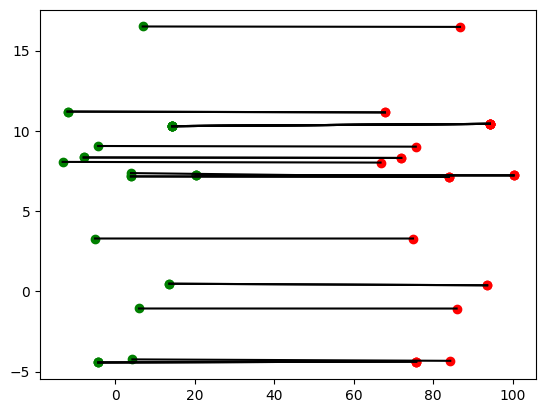

In [17]:
matched_points_1 = point1[:, Ain[:, 0]]
matched_points_2 = point2[:, Ain[:, 1]]
visulize_da(matched_points_1, matched_points_2, gt_tf, displacement = 80)

perform matching on subset of large dataset 

In [18]:
def tf_estimation_lsq(matched_points_a, matched_points_b):
    '''
    matched_points_a: 2 by n numpy array, x, y
    matched_points_b: 2 by n numpy array, x, y
    '''
    tf = np.eye(3)
    centroid_a = np.mean(matched_points_a, axis=1)
    centroid_b = np.mean(matched_points_b, axis=1)
    H = np.zeros((2, 2))
    for i in range(matched_points_a.shape[1]):
        H += np.outer(matched_points_a[:, i] - centroid_a, matched_points_b[:, i] - centroid_b)
    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T
    if np.linalg.det(R) < 0:
        Vt[1, :] *= -1
        R = Vt.T @ U.T
    t = -R @ centroid_a + centroid_b
    tf[0:2, 0:2] = R
    tf[0:2, 2] = t
    return tf

def visualize_matched_points(matched_points_a, matched_points_b, displacement = 80):
    plt.plot(matched_points_a[0, :], matched_points_a[1, :], 'go')
    plt.plot(matched_points_b[0, :]+displacement, matched_points_b[1, :], 'ro')
    plt.show()

[[ 0.99999324 -0.00367812 -0.04980288]
 [ 0.00367812  0.99999324 -0.00839341]
 [ 0.          0.          1.        ]]


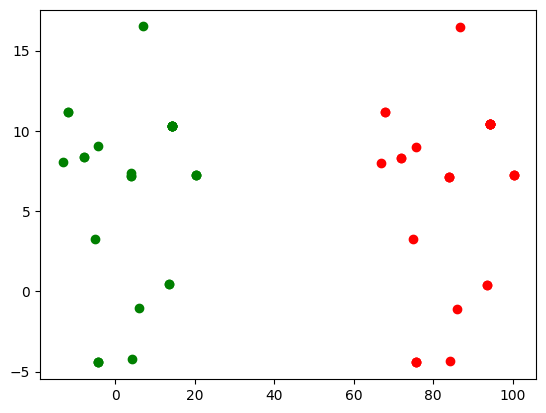

In [20]:
# use least square to estimate the transformation
tf_estimated = tf_estimation_lsq(matched_points_1, matched_points_2)
print(tf_estimated)
visualize_matched_points(matched_points_1, matched_points_2)
